In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from IPython.display import Image

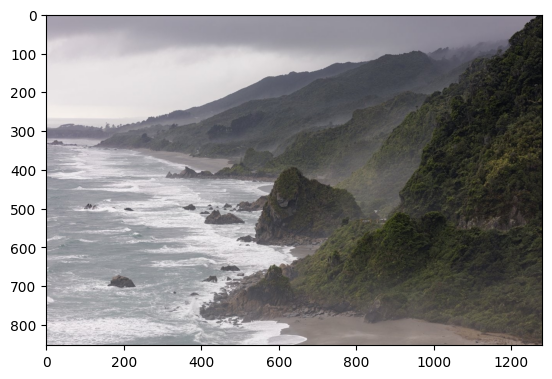

In [ ]:
img_zelland_bgr = cv2.imread("images/new_zelland.jpg", cv2.IMREAD_COLOR)
img_zelland_rgb = cv2.cvtColor(img_zelland_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_zelland_rgb)

In [4]:
matrix = np.ones(img_zelland_rgb.shape, dtype="uint8") * 50

matrix

array([[[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]]], dtype=uint8)

Text(0.5, 1.0, 'Orginal')

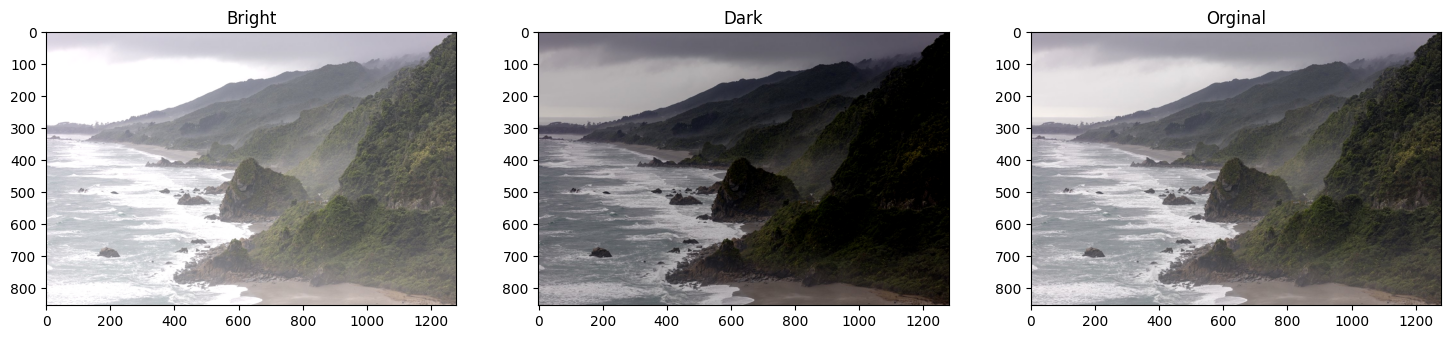

In [5]:
bright_img = cv2.add(img_zelland_rgb, matrix)
dark_img = cv2.subtract(img_zelland_rgb, matrix)

plt.figure(figsize=[18,6])
plt.subplot(1,3,1);plt.imshow(bright_img);plt.title("Bright")
plt.subplot(1,3,2);plt.imshow(dark_img);plt.title("Dark")
plt.subplot(1,3,3);plt.imshow(img_zelland_rgb);plt.title("Orginal")

Text(0.5, 1.0, 'Orginal')

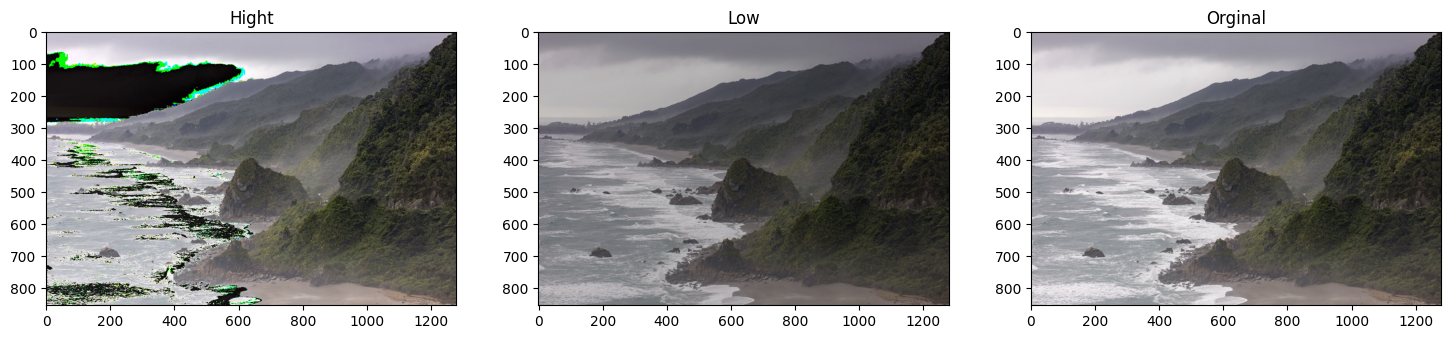

In [14]:
hight_contrast_img = np.ones(img_zelland_rgb.shape) * 1.2
low_contrast_img = np.ones(img_zelland_rgb.shape) * .8

cv_hight_contrast = np.uint8(cv2.multiply(np.float64(img_zelland_rgb), hight_contrast_img))
cv_low_contrast = np.uint8(cv2.multiply(np.float64(img_zelland_rgb), low_contrast_img))

plt.figure(figsize=[18,6])
plt.subplot(1,3,1);plt.imshow(cv_hight_contrast);plt.title("Hight")
plt.subplot(1,3,2);plt.imshow(cv_low_contrast);plt.title("Low")
plt.subplot(1,3,3);plt.imshow(img_zelland_rgb);plt.title("Orginal")

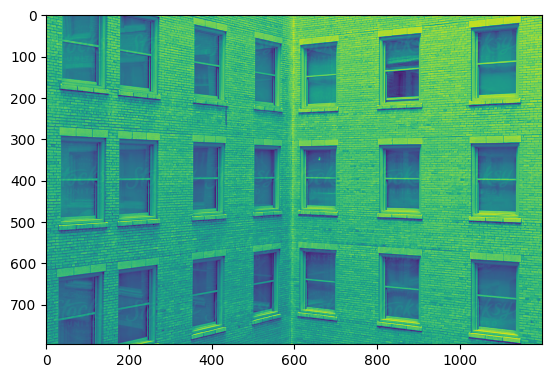

In [15]:
img_window = cv2.imread("images/windows.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_window)


Text(0.5, 1.0, 'Adaptive Threshold')

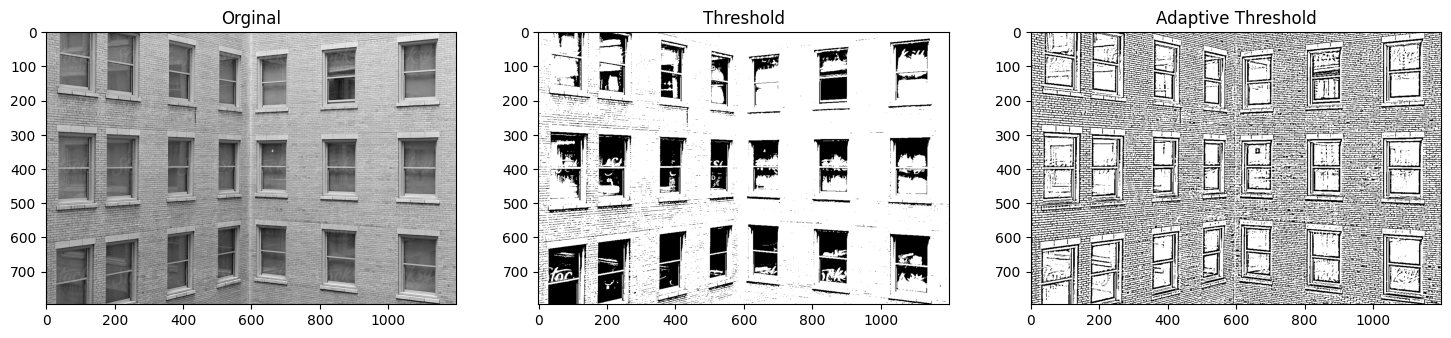

In [23]:
retval, img_threshold = cv2.threshold(img_window, 100, 255, cv2.THRESH_BINARY)
img_threshold_adaptive = cv2.adaptiveThreshold(img_window, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)


plt.figure(figsize=[18,6])
plt.subplot(1,3,1);plt.imshow(img_window, cmap="gray");plt.title("Orginal")
plt.subplot(1,3,2);plt.imshow(img_threshold, cmap="gray");plt.title("Threshold")
plt.subplot(1,3,3);plt.imshow(img_threshold_adaptive, cmap="gray");plt.title("Adaptive Threshold")

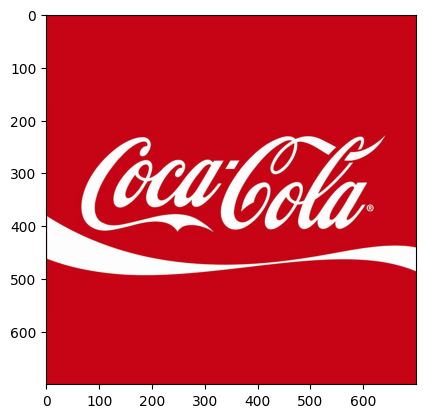

In [25]:
img = cv2.imread("images/coca-cola-logo.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

logo_shape_h = img_rgb.shape[0]
logo_shape_w = img_rgb.shape[1]



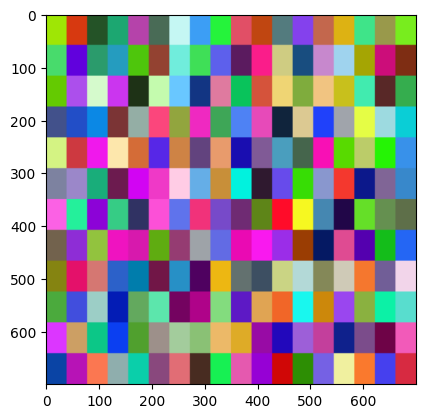

In [27]:
img_color = cv2.imread("images/bg_color.png", cv2.IMREAD_COLOR)
img_bg_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

img_bg_rgb = cv2.resize(img_bg_rgb, (logo_shape_h, logo_shape_w), interpolation=cv2.INTER_AREA)

plt.imshow(img_bg_rgb)

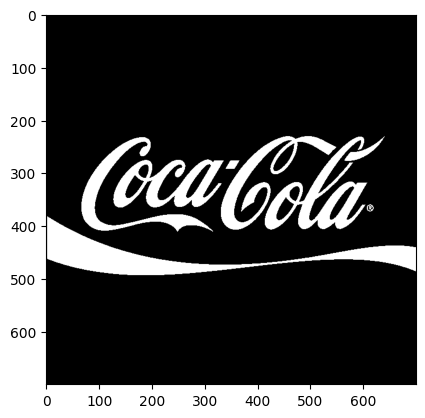

In [30]:
img_mask = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
retval, img_threshold = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_threshold, cmap="gray")

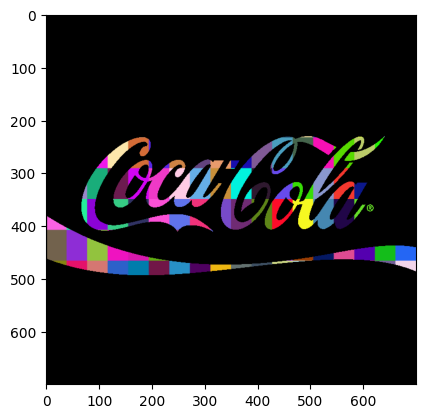

In [31]:
img_bg_mask = cv2.bitwise_and(img_bg_rgb, img_bg_rgb, mask=img_threshold)

plt.imshow(img_bg_mask)

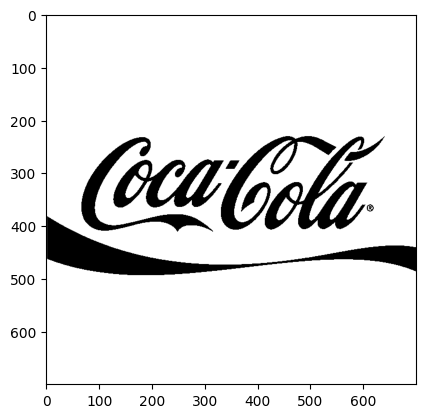

In [38]:
img_mask_inv = cv2.bitwise_not(img_threshold)
plt.imshow(img_mask_inv, cmap="gray")

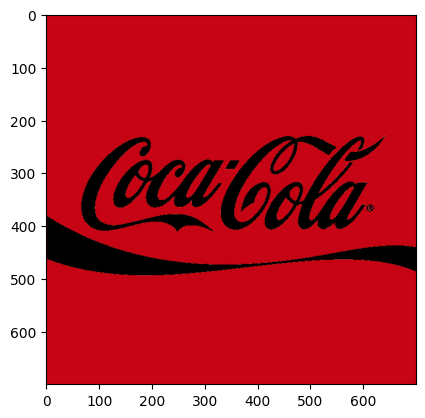

In [40]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

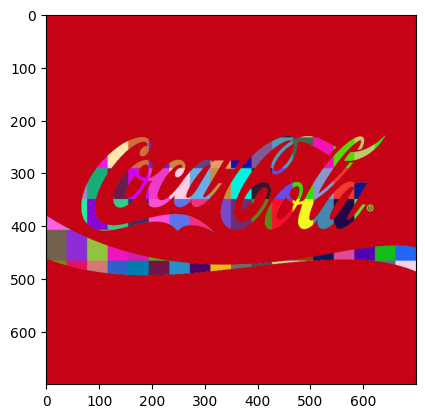

In [42]:
img_merge = cv2.add(img_bg_mask, img_foreground)
plt.imshow(img_merge)